# Credit Risk Analysis

### NECESSARY IMPORTS

In [281]:
# import boto3
# import os
# import sys
# import numpy as np
# import pandas as pd

# from dotenv import load_dotenv #for env variables
from imp import reload #for testing

from src import data_utils, config


### GET DATA

In [282]:
reload(data_utils)
reload(config)

# get data
app_train, app_test, columns_description = data_utils.get_datasets()


/home/chris/Learning-2023/anyoneai_dir/endproj/credit-risk-analysis_o/src/data_utils.py:51: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  app_train = pd.read_csv(config.DATASET_TRAIN, delimiter='\t', encoding='latin1', header=None)


In [283]:
app_train.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


In [284]:
columns_description

,Var_Title,Var_Description,Field_Content
Var_Id,,,
1,ID_CLIENT,Sequential number for the applicant (to be use...,"1-50000, 50001-70000, 70001-90000"
2,CLERK_TYPE,Not informed,C
3,PAYMENT_DAY,"Day of the month for bill payment, chosen by t...","1,5,10,15,20,25"
4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via...,"Web, Carga"
5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the ...,"1,2,NULL"
6,POSTAL_ADDRESS_TYPE,Indicates if the address for posting is the ho...,1.2
7,SEX,NaN,"M=Male, F=Female"
8,MARITAL_STATUS,Encoding not informed,"1,2,3,4,5,6,7"
9,QUANT_DEPENDANTS,NaN,"0, 1, 2, ..."


### EDA

In [285]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [286]:
metadata = columns_description
meta_cols = metadata["Var_Title"].to_list()

- there are 2 columns with the same name "EDUCATION_LEVEL" 
- first is for general education level
- second is for mate education level
- the second column aggregate with "EDUCATION_LEVEL_MATE"

In [287]:
meta_cols[43] = "MATE_EDUCATION_LEVEL"
app_train.columns = meta_cols
app_test.columns = meta_cols[:-1]
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL                 50000 non-null  int64  
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NACIONALITY                     

In [288]:
app_train.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


In [289]:
idx=app_train.columns.get_loc("QUANT_DEPENDANTS")
idx

8

In [290]:
col_unique = {}
for col in app_train.columns.values:
    col_unique[col] = set(app_train[col])
col_unique["CLERK_TYPE"]

{'C'}

In [291]:
app_train.select_dtypes(include="number").columns

Index(['ID_CLIENT', 'PAYMENT_DAY', 'QUANT_ADDITIONAL_CARDS',
       'POSTAL_ADDRESS_TYPE', 'MARITAL_STATUS', 'QUANT_DEPENDANTS',
       'EDUCATION_LEVEL', 'NACIONALITY', 'RESIDENCE_TYPE',
       'MONTHS_IN_RESIDENCE', 'FLAG_EMAIL', 'PERSONAL_MONTHLY_INCOME',
       'OTHER_INCOMES', 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS',
       'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS', 'QUANT_BANKING_ACCOUNTS',
       'QUANT_SPECIAL_BANKING_ACCOUNTS', 'PERSONAL_ASSETS_VALUE', 'QUANT_CARS',
       'MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE',
       'MATE_PROFESSION_CODE', 'MATE_EDUCATION_LEVEL',
       'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF',
       'FLAG_INCOME_PROOF', 'PRODUCT', 'AGE', 'TARGET_LABEL_BAD=1'],
      dtype='object')

In [292]:
app_train.select_dtypes(exclude="number").columns

Index(['CLERK_TYPE', 'APPLICATION_SUBMISSION_TYPE', 'SEX', 'STATE_OF_BIRTH',
       'CITY_OF_BIRTH', 'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY',
       'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE',
       'RESIDENCIAL_PHONE_AREA_CODE', 'FLAG_MOBILE_PHONE', 'COMPANY',
       'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH',
       'FLAG_PROFESSIONAL_PHONE', 'PROFESSIONAL_PHONE_AREA_CODE',
       'FLAG_ACSP_RECORD', 'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3'],
      dtype='object')

In [293]:
app_train.T.iloc[:,:4]

,0,1,2,3
ID_CLIENT,1,2,3,4
CLERK_TYPE,C,C,C,C
PAYMENT_DAY,5,15,5,20
APPLICATION_SUBMISSION_TYPE,Web,Carga,Web,Web
QUANT_ADDITIONAL_CARDS,0,0,0,0
POSTAL_ADDRESS_TYPE,1,1,1,1
SEX,F,F,F,F
MARITAL_STATUS,6,2,2,2
QUANT_DEPENDANTS,1,0,0,0
EDUCATION_LEVEL,0,0,0,0


- show distribution of the target variable values: print the total value count and the percentage of each value, plot this relationship

In [294]:
def compute_stats_count(field):
    count = app_train[field].value_counts().values
    index = app_train[field].value_counts().index
    perc = app_train[field].value_counts().values/len(app_train[field])*100
    return list(zip(index,count,perc))

In [295]:
def percsns(ax,col_stats):
    patches = ax.patches
    for i in range(len(patches)):
        x = patches[i].get_x() + patches[i].get_width()/2
        y = patches[i].get_height()+.05
        ax.annotate("({},{:.1f})%".format(col_stats[i][1],col_stats[i][2]),(x,y),ha="center")


         Total    Percent
0        36959    73.9 
1        13041    26.1 


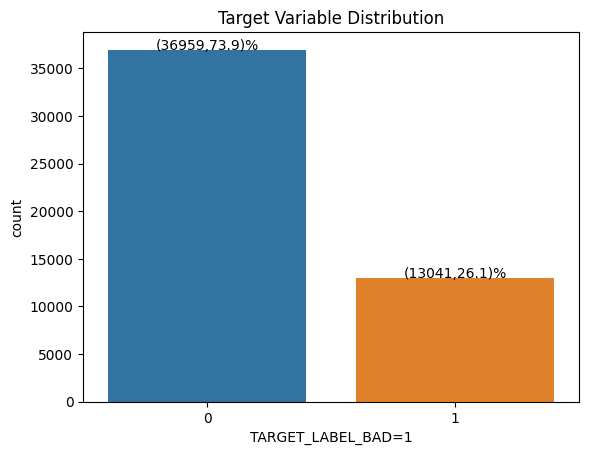

In [296]:
#col_target
target_colname = "TARGET_LABEL_BAD=1"
# get index,count and percentage with compute_stats_count function
target_dist = compute_stats_count(target_colname)
#target_dist.sort(key=lambda x:x[1],reverse=True)

print("{:<8} {:<8} {:<5}".format("","Total","Percent"))
for current_target_dist in target_dist:
    print("{:<8} {:<8} {:<5.1f}".format(
        current_target_dist[0], 
        current_target_dist[1], 
        current_target_dist[2])
    )
    
plt.title("Target Variable Distribution")
ax = sns.countplot(x=app_train[target_colname])
percsns(ax,target_dist)

- Show number of columns of each data type

In [297]:
number_fields = app_train.select_dtypes("number").columns

In [298]:
# show number of columns per data type
float_fields = len(app_train.select_dtypes("float64").columns)
int_fields = len(app_train.select_dtypes("int64").columns)
object_fields = len(app_train.select_dtypes("object").columns)

print(f"float64: {float_fields}")
print(f"int64: {int_fields}")
print(f"object: {object_fields}")

float64: 9
int64: 25
object: 20


- unique values for categorical columns

In [299]:
# show number of unique values per categorical column
object_field_name = app_train.select_dtypes("object").columns.to_list()
for object_field in object_field_name:
    print("{:<30}{}".format(object_field,len(app_train[object_field].unique())))


CLERK_TYPE                    1
APPLICATION_SUBMISSION_TYPE   3
SEX                           4
STATE_OF_BIRTH                29
CITY_OF_BIRTH                 9910
RESIDENCIAL_STATE             27
RESIDENCIAL_CITY              3529
RESIDENCIAL_BOROUGH           14511
FLAG_RESIDENCIAL_PHONE        2
RESIDENCIAL_PHONE_AREA_CODE   102
FLAG_MOBILE_PHONE             1
COMPANY                       2
PROFESSIONAL_STATE            28
PROFESSIONAL_CITY             2237
PROFESSIONAL_BOROUGH          5058
FLAG_PROFESSIONAL_PHONE       2
PROFESSIONAL_PHONE_AREA_CODE  87
FLAG_ACSP_RECORD              1
RESIDENCIAL_ZIP_3             1481
PROFESSIONAL_ZIP_3            1481


- Percentage of missing data for each column

In [300]:
# checking missing data

index_missings = app_train.isna().sum().index
missing_count = app_train.isna().sum()
missing_perc = app_train.isna().sum()/len(app_train)*100

ind_missing_count = list(zip(index_missings,missing_count,missing_perc))
ind_missing_count.sort(key=lambda x:x[1],reverse=True)

print("{:<28} {:<8} {:<5}".format("","Total","Percent"))
for missing in ind_missing_count[:20]:
    print("{:<28} {:<8} {:<5.1f}".format(missing[0], missing[1], missing[2]))

                             Total    Percent
PROFESSIONAL_CITY            33783    67.6 
PROFESSIONAL_BOROUGH         33783    67.6 
MATE_EDUCATION_LEVEL         32338    64.7 
MATE_PROFESSION_CODE         28884    57.8 
PROFESSION_CODE              7756     15.5 
OCCUPATION_TYPE              7313     14.6 
MONTHS_IN_RESIDENCE          3777     7.6  
RESIDENCE_TYPE               1349     2.7  
ID_CLIENT                    0        0.0  
CLERK_TYPE                   0        0.0  
PAYMENT_DAY                  0        0.0  
APPLICATION_SUBMISSION_TYPE  0        0.0  
QUANT_ADDITIONAL_CARDS       0        0.0  
POSTAL_ADDRESS_TYPE          0        0.0  
SEX                          0        0.0  
MARITAL_STATUS               0        0.0  
QUANT_DEPENDANTS             0        0.0  
EDUCATION_LEVEL              0        0.0  
STATE_OF_BIRTH               0        0.0  
CITY_OF_BIRTH                0        0.0  


In [301]:
cols_with_missings = [missing[0] for missing in ind_missing_count[:20] if missing[1]>0]
cols_with_missings

['PROFESSIONAL_CITY',
 'PROFESSIONAL_BOROUGH',
 'MATE_EDUCATION_LEVEL',
 'MATE_PROFESSION_CODE',
 'PROFESSION_CODE',
 'OCCUPATION_TYPE',
 'MONTHS_IN_RESIDENCE',
 'RESIDENCE_TYPE']

- Visualization of missing values

In [302]:
import missingno as msno

<Axes: >

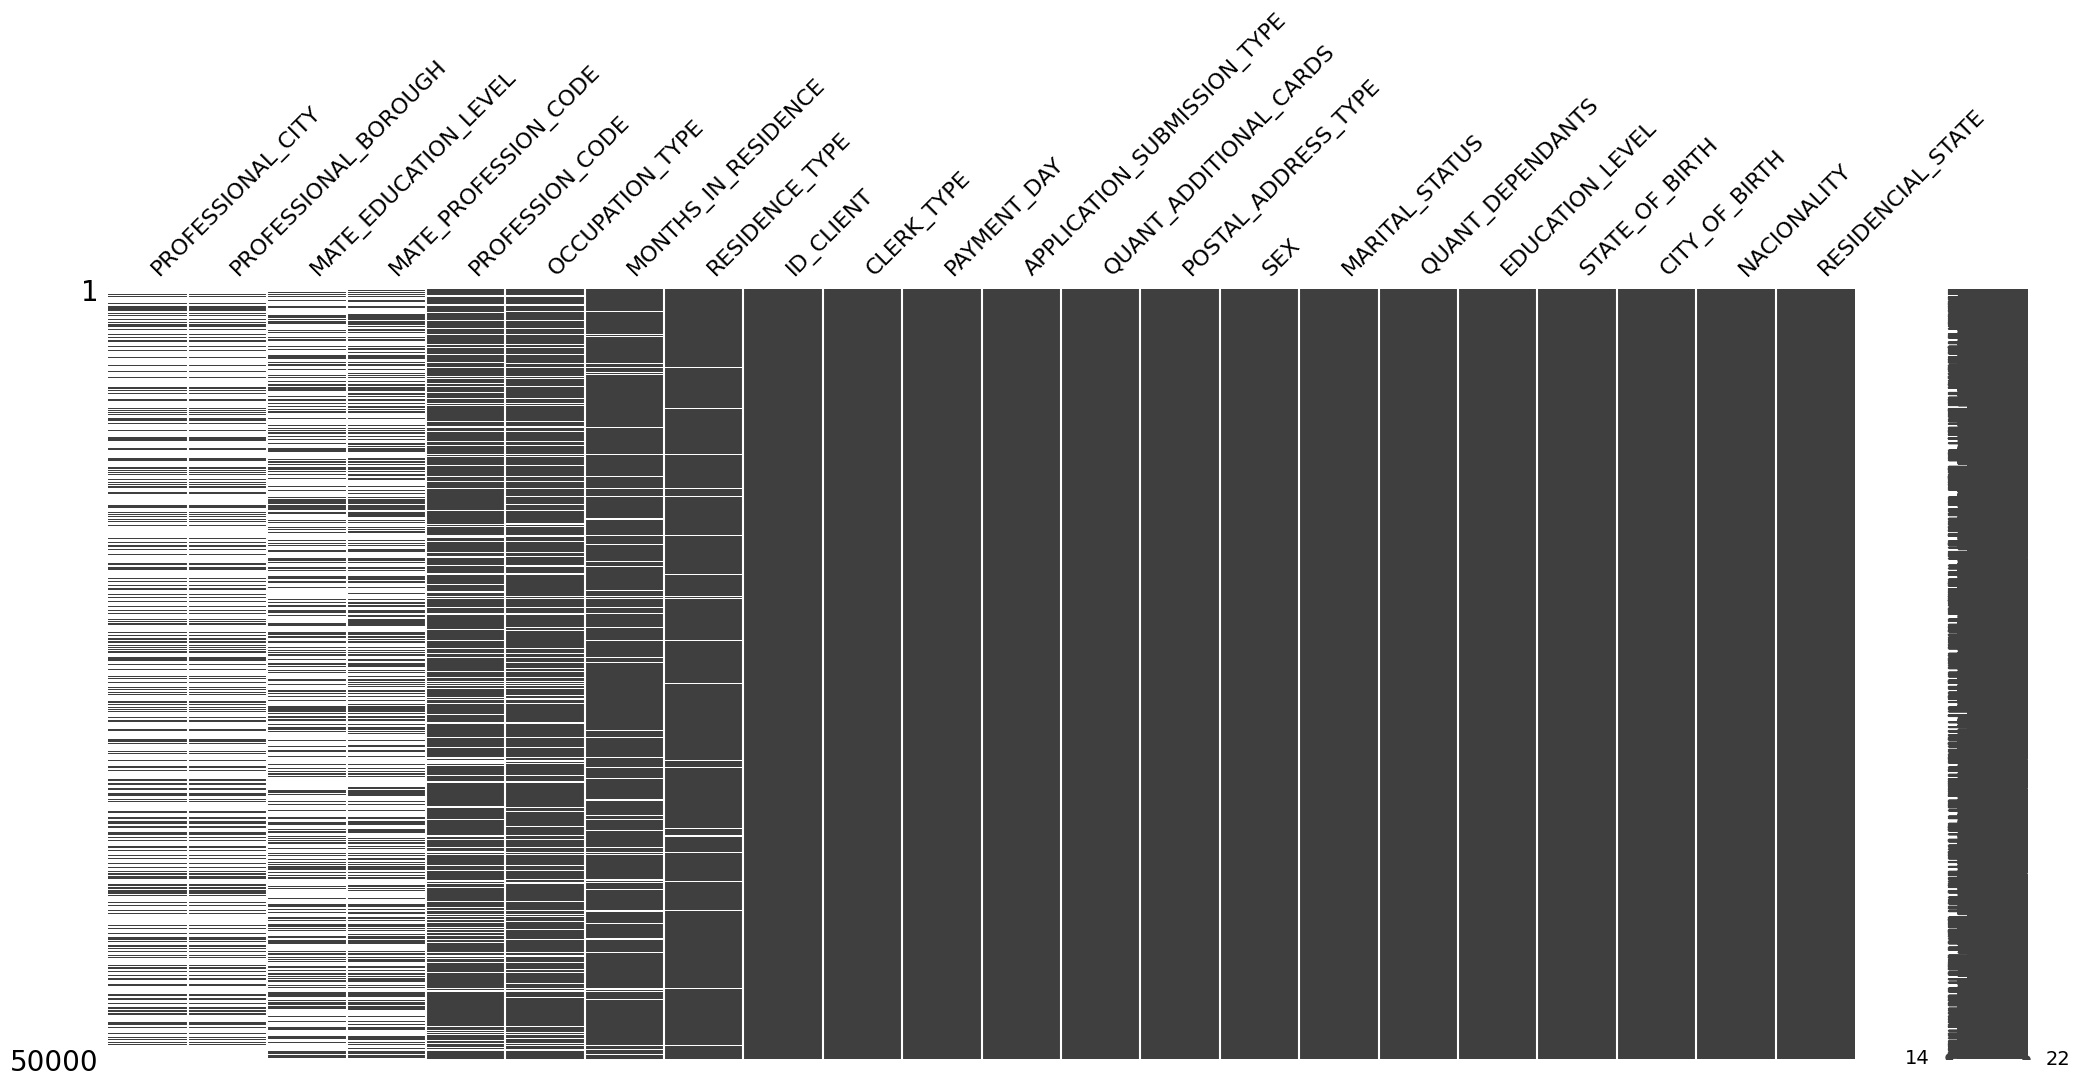

In [303]:
first_colwithnulls = [colwithnulls[0] for colwithnulls in ind_missing_count[:22]]
msno.matrix(app_train[first_colwithnulls])

#### Analyzing distribution of variables
- Show distribution of credit amounts

* Analyzing PERSONAL_MONTHLY_INCOME
  * it is the applicant's personal regular monthly income in Brazilian currency (R$)
  * it will be cast to (dollars$)

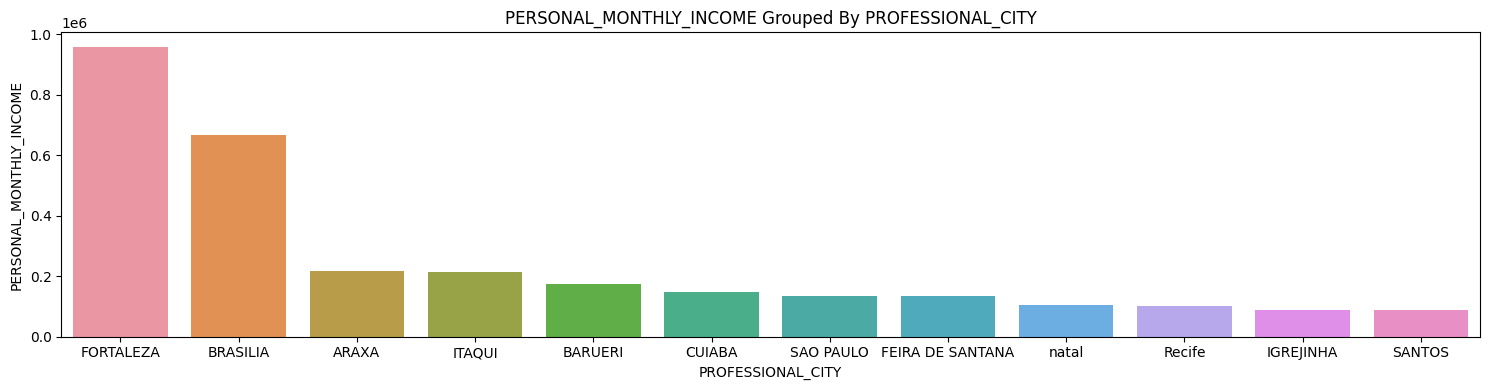

In [304]:
income_colname = "PERSONAL_MONTHLY_INCOME"
other_colname = "PROFESSIONAL_CITY"
df_order_by_income = app_train.sort_values(by=[income_colname],ascending=False,ignore_index=True)
df_income_plot = df_order_by_income.loc[:30,[income_colname,other_colname]]

plt.figure(figsize=(15,4))
plt.title(income_colname+" Grouped By "+other_colname)
sns.barplot(x=df_income_plot[other_colname],y=df_income_plot[income_colname])
plt.tight_layout()

### Analyzing Numerical columns

In [305]:
# colname = "AGE"
# # distribution of AGE
# fig,axs=plt.subplots(1,2,figsize=(12,3))
# sns.histplot(app_train[colname], bins=50,ax=axs[0])
# axs[0].set_title(colname+" Ditribution")
# sns.boxplot(x=app_train[colname],ax=axs[1])
# axs[1].set_title("Box Plot of "+colname+" Dist")

In [306]:
def trunc(valor,liminf, limsup):
        if(valor < liminf):
            return liminf
        if(valor > limsup):
            return limsup
        if(valor > liminf and valor < limsup):
            return valor

def compute_limits(df,field):
    q1 = np.percentile(df[field], 25)
    q3 = np.percentile(df[field], 75)
    iqr = q3 - q1
    limsup = q3 + 1.5 * iqr
    liminf = q1 - 1.5 * iqr
    return liminf, limsup

def plot_outliers(df,field):
    fig,axs = plt.subplots(1,2, figsize=(10,2))
    sns.boxplot(x=df[field],ax=axs[0])
    sns.boxplot(x=df["new"+field],ax=axs[1])
    
def proc_outliers(df,field):  
    # impute nans with mean value of column
    df[field].replace({np.nan: df[field].mean()}, inplace=True)
    
    # compute quantiles
    liminf, limsup = compute_limits(df,field)
    
    # apply truncated function        
    df["new"+field] = df[field].apply(lambda val: trunc(val,liminf,limsup))
    
    # plot before and after of correct outliers
    plot_outliers(df,field)

    # update dataframe
    df[field] = df["new"+field]
    df.drop(["new"+field],axis=1, inplace=True)
        
# process outliers
# print(f"Processing outliers on DAYS_EMPLOYED")
# proc_outliers(working_train_df,"DAYS_EMPLOYED")
# proc_outliers(working_val_df,"DAYS_EMPLOYED")

In [307]:
metadata_dic = {colname:idx for idx,colname in enumerate(meta_cols)}

- Column ID_CLIENT

In [308]:
# show number of unique values per categorical column
number_field_names = app_train.select_dtypes("number").columns.to_list()
category_field_names = app_train.select_dtypes(exclude="number").columns.to_list()

In [309]:
idxs_number_cols = [metadata_dic[number_colname] for number_colname in number_field_names]

In [310]:
metadata.iloc[idxs_number_cols,[0,2]]

,Var_Title,Field_Content
Var_Id,,
1,ID_CLIENT,"1-50000, 50001-70000, 70001-90000"
3,PAYMENT_DAY,"1,5,10,15,20,25"
5,QUANT_ADDITIONAL_CARDS,"1,2,NULL"
6,POSTAL_ADDRESS_TYPE,1.2
8,MARITAL_STATUS,"1,2,3,4,5,6,7"
9,QUANT_DEPENDANTS,"0, 1, 2, ..."
10,EDUCATION_LEVEL,"1,2,3,4,5"
13,NACIONALITY,"0, 1, 2"
19,RESIDENCE_TYPE,"1,2,3,4,5,NULL"


In [311]:
for number_field in number_field_names:
    print("{:<32}{:<8}{}".format(number_field,len(app_train[number_field].unique()),metadata.iloc[metadata_dic[number_field],2]))

ID_CLIENT                       50000   1-50000, 50001-70000, 70001-90000
PAYMENT_DAY                     6       1,5,10,15,20,25
QUANT_ADDITIONAL_CARDS          1       1,2,NULL
POSTAL_ADDRESS_TYPE             2       1.2
MARITAL_STATUS                  8       1,2,3,4,5,6,7
QUANT_DEPENDANTS                17      0, 1, 2, ...
EDUCATION_LEVEL                 1       1,2,3,4,5
NACIONALITY                     3       0, 1, 2
RESIDENCE_TYPE                  7       1,2,3,4,5,NULL
MONTHS_IN_RESIDENCE             89      1,2,... , NULL
FLAG_EMAIL                      2       0.1
PERSONAL_MONTHLY_INCOME         5495    nan
OTHER_INCOMES                   615     nan
FLAG_VISA                       2       0.1
FLAG_MASTERCARD                 2       0.1
FLAG_DINERS                     2       0.1
FLAG_AMERICAN_EXPRESS           2       0.1
FLAG_OTHER_CARDS                2       0,1,NULL
QUANT_BANKING_ACCOUNTS          3       0,1,2
QUANT_SPECIAL_BANKING_ACCOUNTS  3       0,1,2
PERSONAL_ASSE

In [312]:
# colums with missings
cols_with_missings

['PROFESSIONAL_CITY',
 'PROFESSIONAL_BOROUGH',
 'MATE_EDUCATION_LEVEL',
 'MATE_PROFESSION_CODE',
 'PROFESSION_CODE',
 'OCCUPATION_TYPE',
 'MONTHS_IN_RESIDENCE',
 'RESIDENCE_TYPE']

#### Cleaning Data

In [313]:
def plotting_distribution(col_name,train,test):
    fig,axes = plt.subplots(2,2, figsize=(8,3))
    fig.suptitle("Distribution of "+col_name)
    fig.align_labels()

    if(train[col_name].var() != 0):
        sns.kdeplot(ax=axes[0][0],x=train.loc[:,col_name],fill=True)
    else:
        sns.histplot(ax=axes[0][0],x=train.loc[:,col_name],fill=True)
    if(test[col_name].var() != 0):
        sns.kdeplot(ax=axes[1][0],x=test.loc[:,col_name],fill=True)
    else:
        sns.histplot(ax=axes[1][0],x=test.loc[:,col_name],fill=True)

    sns.boxplot(ax=axes[0][1],x=train[col_name])
    sns.boxplot(ax=axes[1][1],x=test[col_name])
    axes[0][0].set_ylabel('Train')
    axes[1][0].set_ylabel('Test')
    plt.tight_layout()
    plt.show()
    plt.close(fig)
    
    

In [314]:
def plot_value_counts(col_name,train,test):
    fig,axes = plt.subplots(1,2, figsize=(6,2))
    fig.suptitle("Value Counts of "+col_name)
    fig.align_labels()
    sns.countplot(ax=axes[0],y=train[col_name])
    sns.countplot(ax=axes[1],y=test[col_name])
    axes[0].set_xlabel('Train')
    axes[1].set_xlabel('Test')
    axes[0].set_ylabel('')
    axes[1].set_ylabel('')
    plt.tight_layout()
    plt.show()
    plt.close(fig)

In [315]:
def cast_to_category(col_name,train,test):
    train[col_name] = train[col_name].astype('category')
    test[col_name] = test[col_name].astype('category')
    print("datatype train of "+col_name +": "+ str(train[col_name].dtype))
    print("datatype test of "+col_name +": "+ str(test[col_name].dtype))

In [316]:
def create_tmp_column(col_name,train,test):
    #copy current column to temporal column
    temp_col = col_name+"_tmp"
    train[temp_col]=train[col_name]
    test[temp_col]=test[col_name]
    return temp_col

In [317]:
def remove_tmp_column(col_name,train,test):
    train.drop([col_name], axis=1,inplace=True)
    test.drop([col_name], axis=1,inplace=True)

In [318]:
# cloning app_train
app_train_cop = app_train.copy()
app_test_cop = app_test.copy()
# show number of unique values per categorical column
number_field_names = app_train.select_dtypes("number").columns.to_list()

In [319]:
# delete ID_CLIENT because it is only an index
curr_col_name = "ID_CLIENT"
app_train_cop.drop(columns=[curr_col_name],inplace=True)
number_field_names.remove(curr_col_name)

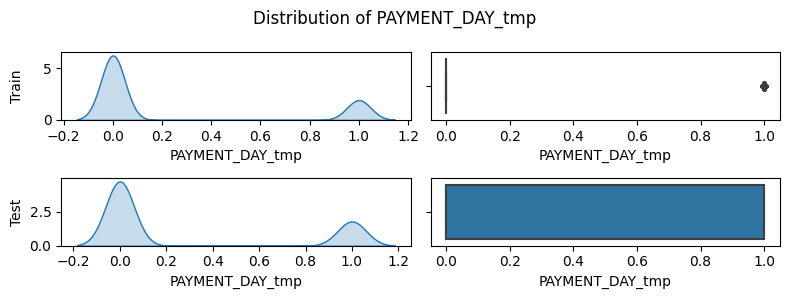

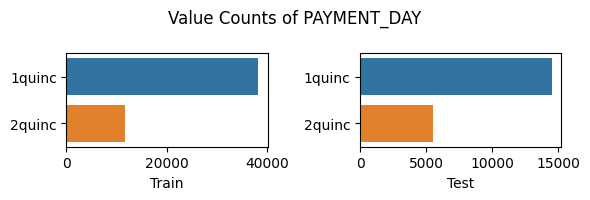

datatype train of PAYMENT_DAY: category
datatype test of PAYMENT_DAY: category


In [320]:
#'PAYMENT_DAY' : split every 15 days
# {0: "1quincena", 1:"2quincena"}
curr_col_name = "PAYMENT_DAY"
bins = [0, 15, 30]
numerical = [0,1]
category = ["1quinc", "2quinc"]

#numerical changes
tmp_col = curr_col_name+"_tmp"
app_train_cop[tmp_col] = np.where(app_train_cop[curr_col_name] <= 15, 0, 1)
app_test_cop[tmp_col] = np.where(app_test_cop[curr_col_name] <= 15, 0, 1)
plotting_distribution(tmp_col,app_train_cop,app_test_cop)
remove_tmp_column(tmp_col,app_train_cop,app_test_cop)

#categorical changes
app_train_cop[curr_col_name] = pd.cut(app_train_cop[curr_col_name], bins, labels=category)
app_test_cop[curr_col_name] = pd.cut(app_test_cop[curr_col_name], bins, labels=category)
plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
cast_to_category(curr_col_name,app_train_cop,app_test_cop)

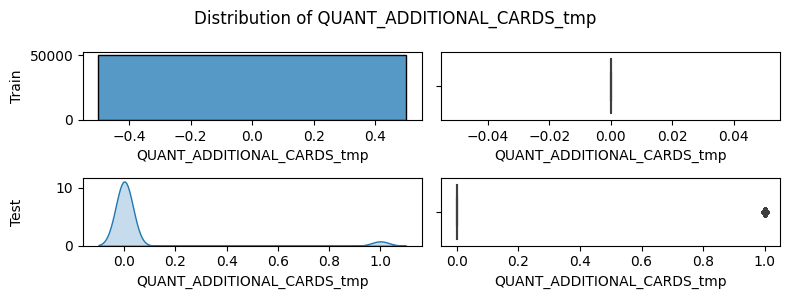

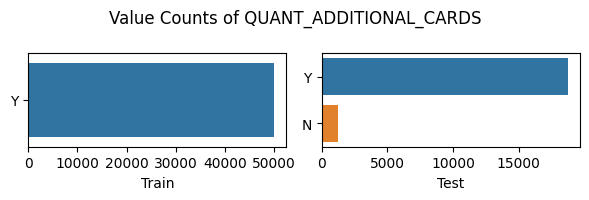

datatype train of QUANT_ADDITIONAL_CARDS: category
datatype test of QUANT_ADDITIONAL_CARDS: category


In [321]:
from sklearn.impute import SimpleImputer
#'QUANT_ADDITIONAL_CARDS' tiene solo un valor (0), se puede eliminar.
# idea: colocar como binario si tiene o no tiene una tarjeta adicional
# se reemplazaran tanto en test con el valor mas frequente de toda
# la distribucion (train + test), valor_frecuente = 0 (sin tarjeta)
# sigue siendo variable numerica
curr_col_name = "QUANT_ADDITIONAL_CARDS"

# numerical changes
tmp_col = curr_col_name+"_tmp"
app_train_cop[tmp_col] = np.where(app_train_cop[curr_col_name] > 0, 1, 0)
app_test_cop[tmp_col] = np.where(app_test_cop[curr_col_name] > 0, 1, 0)
plotting_distribution(tmp_col,app_train_cop,app_test_cop)
remove_tmp_column(tmp_col,app_train_cop,app_test_cop)

# categorical changes
# cast to binary numerical categories {0: have a card, 1: don't have a card}
app_train_cop[curr_col_name].replace({0:"Y", 1:"N", 2:"N"},inplace=True)
app_test_cop[curr_col_name].replace({0:"Y", 1:"N", 2:"N"},inplace=True)

#impute nans in testing with 0 (most frequent from train)
imp_const_zero = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value="Y")
app_test_cop[curr_col_name]=imp_const_zero.fit_transform(app_test_cop[[curr_col_name]]).ravel()

plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
cast_to_category(curr_col_name,app_train_cop,app_test_cop)



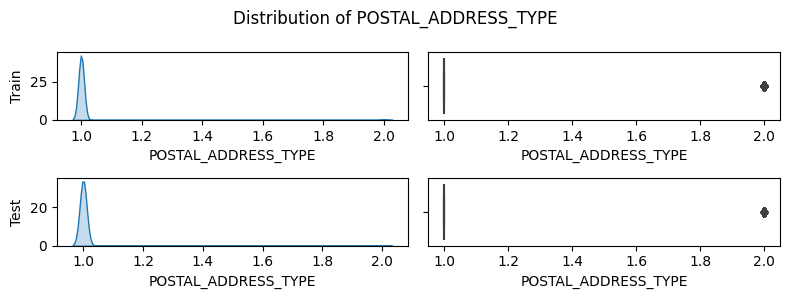

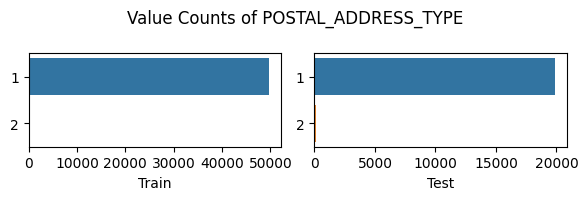

datatype train of POSTAL_ADDRESS_TYPE: category
datatype test of POSTAL_ADDRESS_TYPE: category


In [322]:

#'POSTAL_ADDRESS_TYPE' tiene (1=49673, 2=327) 
# se puede eliminar por la disparidad de valores.
# keep values it could be deleted after of seeing feature importances
curr_col_name = "POSTAL_ADDRESS_TYPE"
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
cast_to_category(curr_col_name,app_train_cop,app_test_cop)

In [323]:
# view the relation between age and marital status
# in order to set what is every code of marital status
curr_col_name = "MARITAL_STATUS"
print("Relationship between Age and Marital Status")
app_train_cop[["AGE",curr_col_name]].groupby([curr_col_name]).median()
# conclude marital status by year
# it has 35 years old -> single (a single person has few years old)
# it has 42 years old -> married (a married person has more years old)

Relationship between Age and Marital Status


,AGE
MARITAL_STATUS,
0,38.0
1,35.0
2,42.0
3,50.0
4,62.0
5,48.0
6,35.0
7,48.0


#### Marital Status Code in Brazil
- regards to this [standard](https://international.ipums.org/international-action/variables/MARST#codes_section)

|code|marital status|
|---|---------------|
|0| NIU (not in universe)|
|1|	Single/never married *|	
|2|	Married/in union *|
|3|	Separated/divorced/spouse absent|
|4|	Widowed|

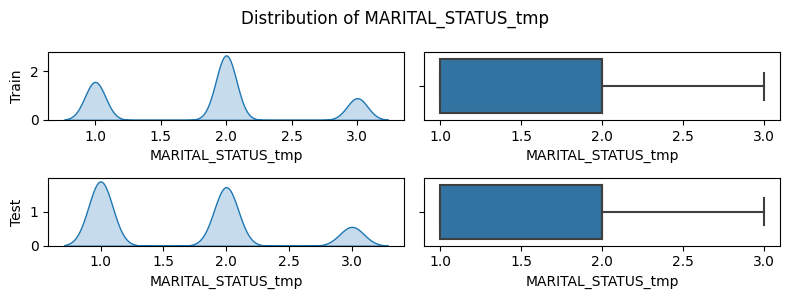

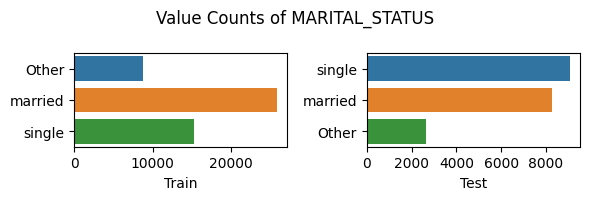

datatype train of MARITAL_STATUS: category
datatype test of MARITAL_STATUS: category


In [324]:
#'MARITAL_STATUS' tiene números del 0 al 7, 
#la mayoría están concentrados en (1=15286, 2=25967), 
#los otros números podemos codificarlo como indeterminado 
#para no eliminar esta columnas.
curr_col_name = "MARITAL_STATUS"
# {single:1, married: 2, rest:3}

#numerical changes
tmp_col = create_tmp_column(curr_col_name,app_train_cop,app_test_cop)
app_train_cop.loc[~app_train_cop[tmp_col].between(1,2),tmp_col]=3
app_test_cop.loc[~app_test_cop[tmp_col].between(1,2),tmp_col]=3
plotting_distribution(tmp_col,app_train_cop,app_test_cop)
remove_tmp_column(tmp_col,app_train_cop,app_test_cop)

#categorical changes
app_train_cop[curr_col_name] = np.where(app_train_cop[curr_col_name] == 1, 'single', 
         np.where(app_train_cop[curr_col_name] == 2, 'married', 'Other'))
app_test_cop[curr_col_name] = np.where(app_test_cop[curr_col_name] == 1, 'single', 
         np.where(app_test_cop[curr_col_name] == 2, 'married', 'Other'))
plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
cast_to_category(curr_col_name,app_train_cop,app_test_cop)

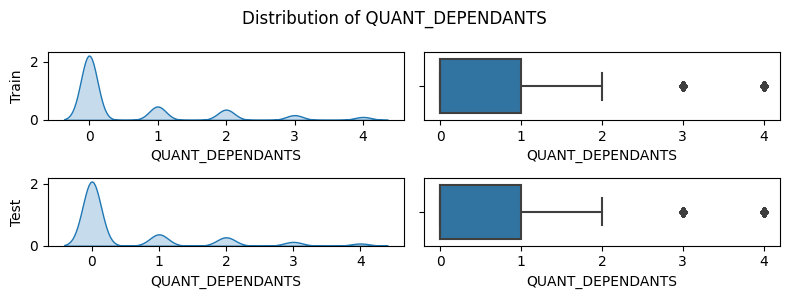

In [325]:
# 'QUANT_DEPENDANTS' tiene números de 0 hasta el 13 y el 53, 
# podemos clasificar con si y no, o en 0, 1, 2, 3 y 4+.
# summarizing, in range[0,1,2,3,4+]
# there exist a scale dependence between every numeric value
# so it keeps as a numerical value
curr_col_name = "QUANT_DEPENDANTS"
app_train_cop.loc[app_train_cop[curr_col_name]>4,curr_col_name] = 4
app_test_cop.loc[app_test_cop[curr_col_name]>4,curr_col_name] = 4

plotting_distribution(curr_col_name,app_train_cop,app_test_cop)

#### Education System in Brazil coding

- start from Tertiary education

|   | Education | School/Level                           | Years |
|---|-----------|----------------------------------------|:-----:|
| - | Primary   | Ensino Fundamental (Elementary School) |   9   |
| 0 | Secondary | Ensino Médio (High School)             |   3   |
| 1 | Tertiary  | Higher Education- Ensino Superior      |       |
| 2 | Tertiary  | Bacharelado, Licenciado (Undergrad.)   |  4–6  |
| 3 | Tertiary  | Especialização (Graduate)              |   1   |
| 4 | Tertiary  | Mestre (Graduate)                      |  1–2  |
| 5 | Tertiary  | Doutor (Doctoral)                      |   2   |

[Education System in Brazil](https://www.scholaro.com/db/countries/brazil/education-system)

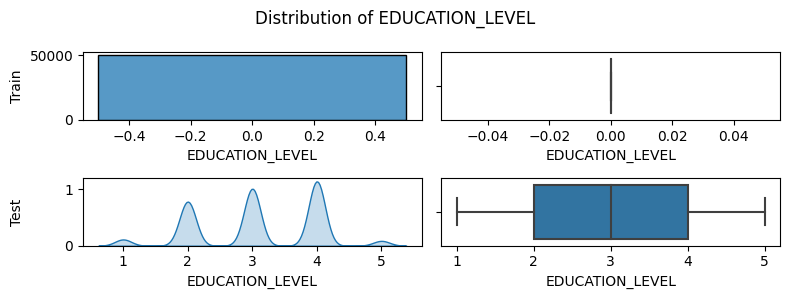

In [326]:
#'EDUCATION_LEVEL' solo tiene un numero 0, se puede eliminar.
# 5 Profesional Education o 1
# 0:secundaria completa, 1:tienen estudios superiores
# there exist a scale dependence between every numeric value
# so it keeps as a numerical value
# the problem is match MATE EDUCATION LEVEL
# we don't know exactly the respective code, when predict
# and use an wrong code it could add bias to the result
# of the model so it will be remove
curr_col_name = "EDUCATION_LEVEL"
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

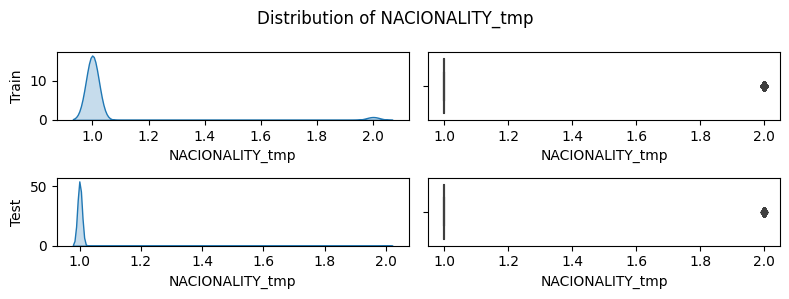

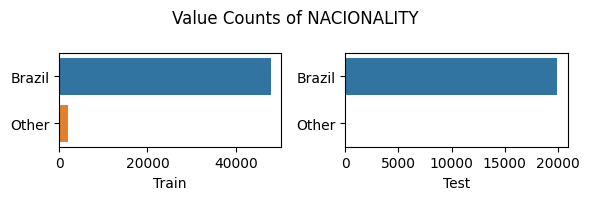

datatype train of NACIONALITY: category
datatype test of NACIONALITY: category


In [327]:
# 'NATIONALITY' los valores que tiene son (2=98, 0=2018, 1=47884) 
# se puede eliminar por la disparidad de valores.
# debe ser categorico y sera brazil:1 otros:2

curr_col_name = "NACIONALITY" # correct translation -> NATIONALITY

#numerical changes
tmp_col = create_tmp_column(curr_col_name,app_train_cop,app_test_cop)
app_train_cop.loc[app_train_cop[tmp_col]==0,tmp_col] = 2
app_test_cop.loc[app_test_cop[tmp_col]==0,tmp_col] = 2
plotting_distribution(tmp_col,app_train_cop,app_test_cop)
remove_tmp_column(tmp_col,app_train_cop,app_test_cop)

#categorical changes
app_train_cop[curr_col_name] = np.where(app_train_cop[curr_col_name] == 1, 'Brazil','Other')
app_test_cop[curr_col_name] = np.where(app_test_cop[curr_col_name] == 1, 'Brazil','Other')
plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
cast_to_category(curr_col_name,app_train_cop,app_test_cop)


|code|Residence Type|
|---|---|
|0|otros|
|1|owned|
|2|mortgage|
|3|rented|
|4|parents|
|5|family|

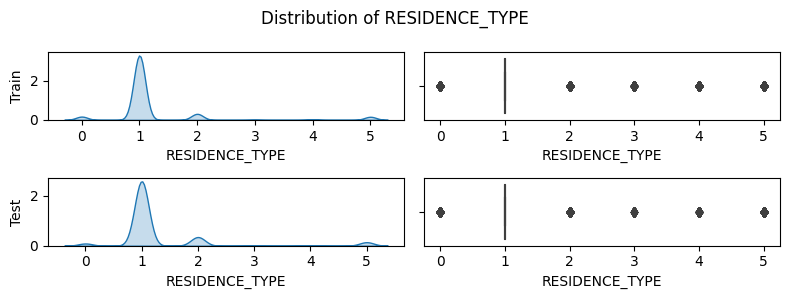

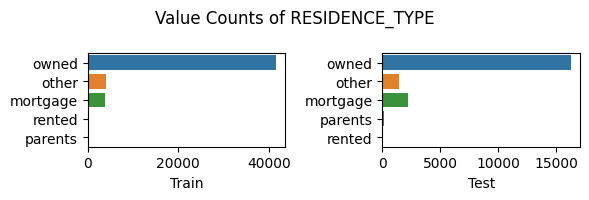

datatype train of RESIDENCE_TYPE: category
datatype test of RESIDENCE_TYPE: category


In [328]:
# 'RESIDENCE_TYPE' tiene valores del 0 hasta el 5, 
# el de mayor proporcion es el 1 con 41572 filas, 
# creo se puede eliminar al no tener mejor informacion.
# it should be categoric, value is maintained because of living zone

curr_col_name = "RESIDENCE_TYPE"

#impute nans in testing with 0 (it already has a other category)
imp_const_zero = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
app_train_cop[curr_col_name]=imp_const_zero.fit_transform(app_train_cop[[curr_col_name]]).ravel()
app_test_cop[curr_col_name]=imp_const_zero.fit_transform(app_test_cop[[curr_col_name]]).ravel()
# it doesn't need a numerical change only fill nans
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)

#categorical changes
app_train_cop[curr_col_name] = np.where(app_train_cop[curr_col_name] == 1, 'owned',
                                np.where(app_train_cop[curr_col_name] == 2, "mortgage",
                                    np.where(app_train_cop[curr_col_name] == 3, "rented",
                                        np.where(app_train_cop[curr_col_name] == 4, "parents",
                                            np.where(app_train_cop[curr_col_name] == 4, "family","other")))))

app_test_cop[curr_col_name] = np.where(app_test_cop[curr_col_name] == 1, 'owned',
                                np.where(app_test_cop[curr_col_name] == 2, "mortgage",
                                    np.where(app_test_cop[curr_col_name] == 3, "rented",
                                        np.where(app_test_cop[curr_col_name] == 4, "parents",
                                            np.where(app_test_cop[curr_col_name] == 4, "family","other")))))

plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
cast_to_category(curr_col_name,app_train_cop,app_test_cop)

- Regards to this Concepts [Normalization or Imputation](https://stats.stackexchange.com/questions/138203/imputation-of-missing-data-before-or-after-centering-and-scaling)

- First Normalization because of using standard values and working models imputers with small values,
other reason normalization avoid using bias from imputed values
only using bias from raw data with nans.
If you use imputing step first, it could add some bias, modifying distribution of values and getting other statistic when it applied normalization at the end.

- Regards to this Concepts [Scale with outliers](https://machinelearningmastery.com/robust-scaler-transforms-for-machine-learning/#:~:text=Standardization%20is%20calculated%20by%20subtracting,dividing%20by%20the%20standard%20deviation.&text=Sometimes%20an%20input%20variable%20may,are%20overrepresented%20for%20some%20reason.)
  
- Robust Scaler is a great standarization using interquartile range. It uses mean zero and standard deviation 1, and it could select interquartile range in order to consider more outliers with less window or few outliers with wide window

In [329]:
#'MONTH_IN_RESIDENCE' tiene cerda de 90 valores diferentes, y 3777 valores nulos, 
# podemos normalizar por valores de cada 6 meses 
# y los nulos se pueden cambiar por 0 a 6 meses.
# it should be numerical because of scalar dependency

# imputar nans con un valor estadistico, 
# imputar zero representaria una persona que recien se ha mudado y pide un prestamo
# lo cual es poco probable
# al tener muchos valores de pequeña frecuencia
# el median podria crear una nueva categoria alejada de la distribucion
# el mean se acercara al medio de la distribucion
# por lo cual se imputara los nulls con un mean de datos
curr_col_name = "MONTHS_IN_RESIDENCE"

In [330]:
def compute_limits(df,field):
    q1 = np.percentile(df[field], 25)
    q3 = np.percentile(df[field], 75)
    iqr = q3 - q1
    limsup = q3 + 1.5 * iqr
    liminf = q1 - 1.5 * iqr
    print("lims: [{},{}]".format(liminf,limsup))
    return liminf, limsup

def plot_outliers(df,field,tmp_field):
    fig,axs = plt.subplots(1,2, figsize=(10,2))
    sns.boxplot(x=df[field],ax=axs[0])
    sns.boxplot(x=df[tmp_field],ax=axs[1])
    
def proc_outliers(df,field):      
    # impute nans with mean value of column
    df[field].replace({np.nan: df[field].mean()}, inplace=True)

    # compute quantiles
    liminf, limsup = compute_limits(df,field)

    tmp_field = "new"+field      
    # apply truncated function
    df[tmp_field] = df[field]
    df.loc[df[tmp_field]<liminf,tmp_field] = liminf
    df.loc[df[tmp_field]>limsup,tmp_field] = limsup
    
    # plot before and after of correct outliers
    plot_outliers(df,field,tmp_field)

    # update dataframe
    df[field] = df[tmp_field]
    df.drop([tmp_field],axis=1, inplace=True)

lims: [-16.0,32.0]


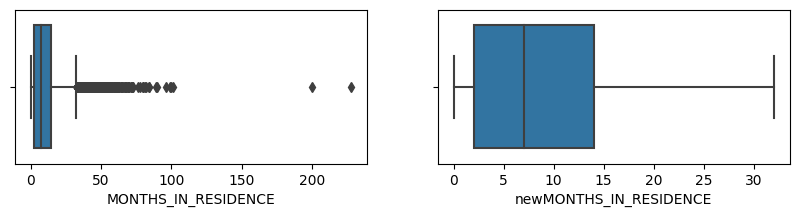

In [331]:
# with a box plot you could see what is the cut or split to divide and 
# accumulate rest outliers in the boundaries (right boundary)
app_train_tmp = app_train.copy()
proc_outliers(app_train_tmp,curr_col_name)
# in this 32 aproximately is the right boundary to cut the values
# 32 months represent 3 years aproximately as a split
# divided in 3 categories (6 months, 1 year, +1 year)
# it keeps the distribution

In [332]:
# look at relationship between target and months_in_residence
print("Relationship between Target and Months in Residence")
app_train_cop[["TARGET_LABEL_BAD=1",curr_col_name]].groupby([curr_col_name]).count()[::6]

Relationship between Target and Months in Residence


,TARGET_LABEL_BAD=1
MONTHS_IN_RESIDENCE,
0.0,4695
6.0,1605
12.0,1121
18.0,589
24.0,254
30.0,1166
36.0,106
42.0,49
48.0,32


#### Review this TODO

- Select in apropiately way the features which have a relevanc: [Feature Selection](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b) 

1. Filter
2. Wrapper
3. Embedded

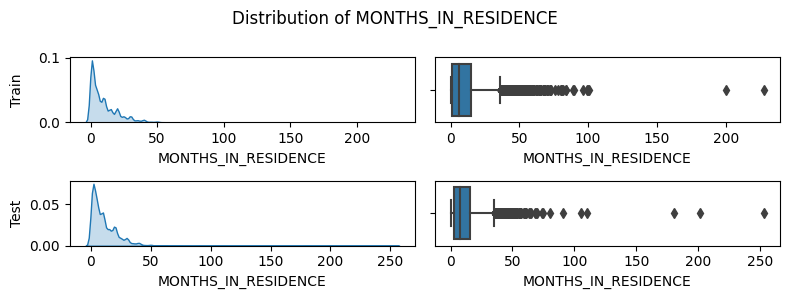

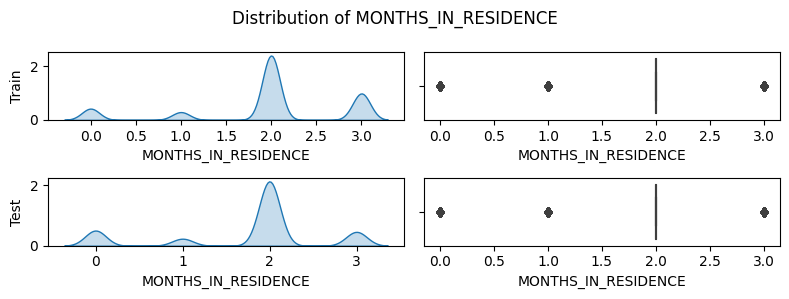

In [333]:
# it must be numerical value for scalar dependency

# chatgpt: 
# give more weight to features that are more directly related to the target variable
# is generally valid. By doing so, you can guide the model to focus more on the features 
# that have a stronger influence on the prediction.
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
# 0:+3year, 1:3years, 2:2years, 3:1year
app_train_cop[curr_col_name] = np.where(app_train_cop[curr_col_name] <= 1, 3,
             np.where(app_train_cop[curr_col_name] <= 24, 2,
                      np.where(app_train_cop[curr_col_name] <= 36, 1, 0)))
app_test_cop[curr_col_name] = np.where(app_test_cop[curr_col_name] <= 1, 3,
             np.where(app_test_cop[curr_col_name] <= 24, 2,
                      np.where(app_test_cop[curr_col_name] <= 36, 1, 0)))

plotting_distribution(curr_col_name,app_train_cop,app_test_cop)

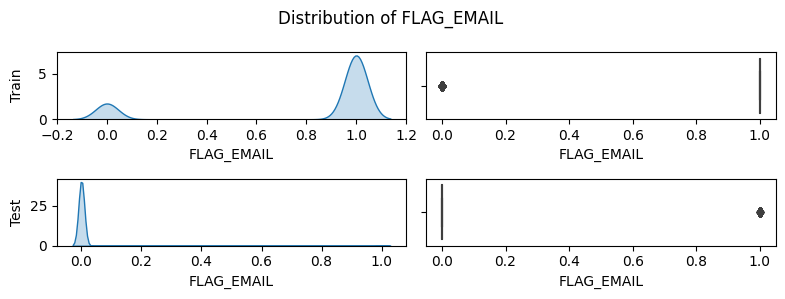

datatype train of FLAG_EMAIL: category
datatype test of FLAG_EMAIL: category


In [334]:
# 'FLAG_EMAIL' tiene valores de 0=9886, 1=40114, 
# se puede usar como indicador,? aunque la diferencia es de 4 a 1.
curr_col_name = "FLAG_EMAIL"
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
cast_to_category(curr_col_name,app_train_cop,app_test_cop)


#### Minimal Wage in Brazil
[Minimal Wage](https://www.remoti.io/blog/average-salary-in-brazil#:~:text=Minimum%20Wage,around%201.67%20USD%20per%20hour.). 
|Type of salary in Br|BRL/R$|
|--------------------|-----|
|minimum montlhy wage| 1320|
|average monthly cost of living| 3323|
|average monthly salary| 8560|
|highest-paid salary| 38200|

range of income achieve more than highest paid, it could be more than 40'000

In [335]:
# OTHER_INCOMES it could be add to personal income
# in order to increase people who has less than minimal salary
curr_col_name = "MONTHLY_INCOMES_TOT"
app_train_cop[curr_col_name] = app_train_cop["PERSONAL_MONTHLY_INCOME"] + app_train_cop["OTHER_INCOMES"]
app_test_cop[curr_col_name] = app_test_cop["PERSONAL_MONTHLY_INCOME"] + app_test_cop["OTHER_INCOMES"]

In [336]:
print("Rare Salaries more than highest paid")
print(app_train_cop.loc[app_train_cop[curr_col_name] < 1300,curr_col_name].sort_values()[:10])
print(app_train_cop.loc[app_train_cop[curr_col_name] > 40000,curr_col_name].sort_values()[:10])
print(app_train_cop.loc[app_train_cop[curr_col_name] > 500000,curr_col_name].sort_values()[:10])
print(app_train_cop.loc[app_train_cop[curr_col_name] > 900000,curr_col_name].sort_values()[:10])

Rare Salaries more than highest paid
15912     60.0
19347     69.0
33280     94.0
9771     100.0
39926    100.0
26719    100.0
3891     100.0
12708    100.0
8445     100.0
19553    100.0
Name: MONTHLY_INCOMES_TOT, dtype: float64
33748    40500.0
9146     40925.0
10068    41557.0
7756     43721.0
48803    45083.0
1423     46245.0
11338    46348.0
29044    52475.0
44773    53508.0
17960    53535.0
Name: MONTHLY_INCOMES_TOT, dtype: float64
28119    668000.0
48271    875000.0
31053    959000.0
Name: MONTHLY_INCOMES_TOT, dtype: float64
31053    959000.0
Name: MONTHLY_INCOMES_TOT, dtype: float64


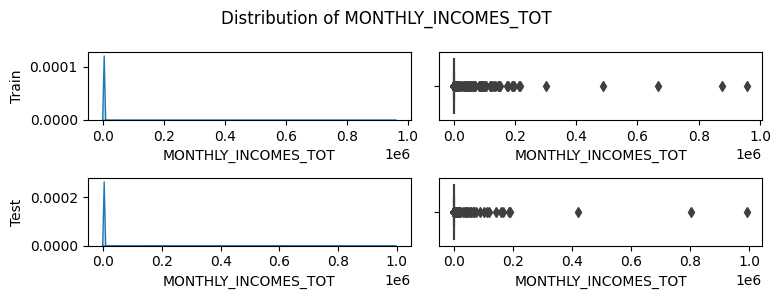

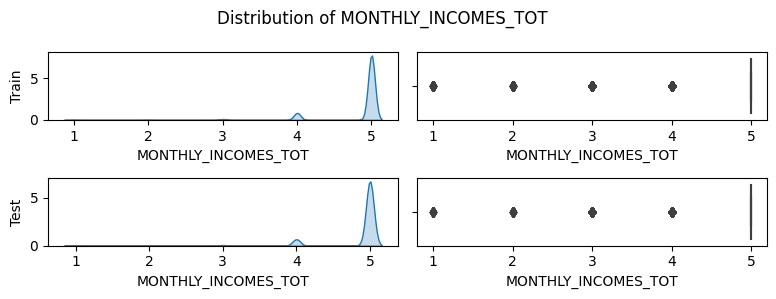

In [337]:
# 'PERSONAL_MONTHLY_INCOME' no tiene valores nulos, 
# se puede usar como indicador, pero hay que ajustar entre rangos, 
# para mejorar la calidad de la columna.
# Separate by ranges but keeping numerical behaviour
# weight more to minimal ranges and less weight to great ranges
# focuse people who has minimal salary

# according to this 
curr_col_name = "MONTHLY_INCOMES_TOT"
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)

# |minimum montlhy wage| 1320|
# |average monthly cost of living| 3323|
# |average monthly salary| 8560|
# |highest-paid salary| 38200|

#it should be a numerical value

app_train_cop[curr_col_name] = np.where(app_train_cop[curr_col_name] < 1320, 5,
            np.where(app_train_cop[curr_col_name] < 3323, 4,
            np.where(app_train_cop[curr_col_name] < 8560, 3,
            np.where(app_train_cop[curr_col_name] < 38200, 2, 1))))

app_test_cop[curr_col_name] = np.where(app_test_cop[curr_col_name] < 1320, 5,
            np.where(app_test_cop[curr_col_name] < 3323, 4,
            np.where(app_test_cop[curr_col_name] < 8560, 3,
            np.where(app_test_cop[curr_col_name] < 38200, 2, 1))))


plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
remove_tmp_column("PERSONAL_MONTHLY_INCOME",app_train_cop,app_test_cop)
remove_tmp_column("OTHER_INCOMES",app_train_cop,app_test_cop)

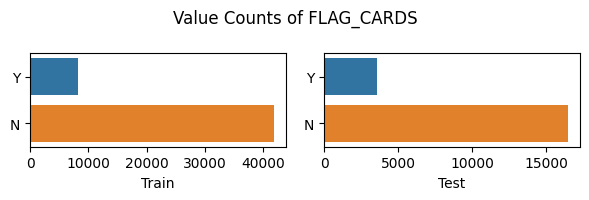

In [338]:
# 'FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 
# 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS' 
# se podria colocar como si tiene o no tarjeta de credito, o cantidad de tarjetas de credito sin importar la marca.
# it was a good idea from Yessid to join flag cards
# and keep as a categorical variable
curr_col_name = 'FLAG_CARDS'

list_cards = ['FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS']

app_train_cop[curr_col_name] = np.where(app_train_cop[list_cards[0]]>0, 'Y', 
            np.where(app_train_cop[list_cards[1]]>0, 'Y',
            np.where(app_train_cop[list_cards[2]]>0, 'Y',
            np.where(app_train_cop[list_cards[3]]>0, 'Y',
            np.where(app_train_cop[list_cards[4]]>0, 'Y', 'N')))))

app_test_cop[curr_col_name] = np.where(app_test_cop[list_cards[0]]>0, 'Y', 
            np.where(app_test_cop[list_cards[1]]>0, 'Y',
            np.where(app_test_cop[list_cards[2]]>0, 'Y',
            np.where(app_test_cop[list_cards[3]]>0, 'Y',
            np.where(app_test_cop[list_cards[4]]>0, 'Y', 'N')))))


plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
for card in list_cards:
    remove_tmp_column(card,app_train_cop,app_test_cop)

In [339]:
# 'QUANT_BANKING_ACCOUNTS' 
# tiene 3 valores (2=14, 1=17864, 0=32122), 
# se podria categorizar en si tiene o no tiene cuenta
# It should be a numerical value, quantity of cards 
# could be influenced on target variable
curr_col_name = "QUANT_BANKING_ACCOUNTS_TOT"

app_train_cop[curr_col_name] = app_train_cop["QUANT_BANKING_ACCOUNTS"] + app_train_cop["QUANT_SPECIAL_BANKING_ACCOUNTS"]
app_test_cop[curr_col_name] = app_test_cop["QUANT_BANKING_ACCOUNTS"] + app_test_cop["QUANT_SPECIAL_BANKING_ACCOUNTS"]

In [340]:
# look at relationship between target and months_in_residence
print("Relationship between Target and QUANT_BANKING_ACCOUNTS")
# people who has many banking cards is likely that they will pay the loan
# people who has few banking cards is likely that they won't pay the loan
app_train_cop[["TARGET_LABEL_BAD=1",curr_col_name]].groupby([curr_col_name]).count()

Relationship between Target and QUANT_BANKING_ACCOUNTS


,TARGET_LABEL_BAD=1
QUANT_BANKING_ACCOUNTS_TOT,
0,32122
2,17864
4,14


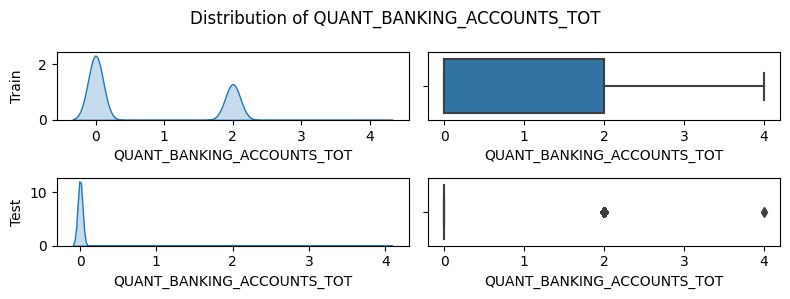

In [341]:
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
remove_tmp_column("QUANT_BANKING_ACCOUNTS",app_train_cop,app_test_cop)
remove_tmp_column("QUANT_SPECIAL_BANKING_ACCOUNTS",app_train_cop,app_test_cop)

In [342]:
# PERSONAL ASSETS VALUE
# it achieves range from [0 to 6'000'000] of R$
# it could be a numerical value but with coded weight
curr_col_name = "PERSONAL_ASSETS_VALUE"
app_train_cop[["TARGET_LABEL_BAD=1",curr_col_name]].groupby([curr_col_name]).count()[::10]
# people who don't have any personal values likely pay their loans

,TARGET_LABEL_BAD=1
PERSONAL_ASSETS_VALUE,
0.0,47609
27.0,1
60.0,1
260.0,2
4000.0,6
8300.0,2
12000.0,44
18000.0,34
25000.0,198


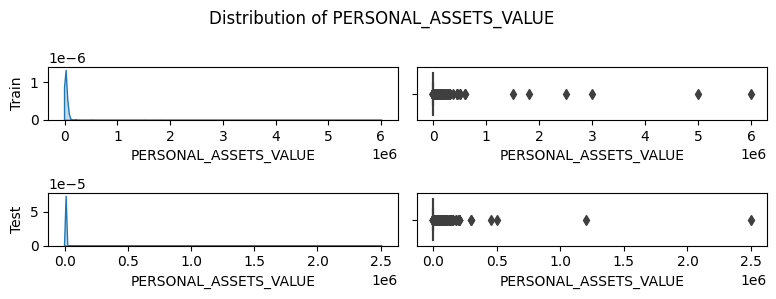

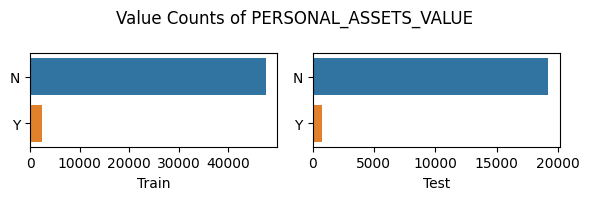

datatype train of PERSONAL_ASSETS_VALUE: category
datatype test of PERSONAL_ASSETS_VALUE: category


In [343]:
#before of cast to categorical
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
# it has counting more in people who don't have any personal value
# so it could be cast in categorical as Y, N category
app_train_cop[curr_col_name] = np.where(app_train_cop[curr_col_name]>0,"Y","N")
app_test_cop[curr_col_name] = np.where(app_test_cop[curr_col_name]>0,"Y","N")
plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
cast_to_category(curr_col_name,app_train_cop,app_test_cop)

In [344]:
# QUANT_CARS' se podria cambiar si tiene carro o no, 
# ya que los valores son 0 y 1.
# it should be a categorical value of Y,N
curr_col_name = "QUANT_CARS"
app_train_cop[["TARGET_LABEL_BAD=1",curr_col_name]].groupby([curr_col_name]).count()
# an important personal active 
# people who don't have a car likely won't pay the loan

,TARGET_LABEL_BAD=1
QUANT_CARS,
0,33193
1,16807


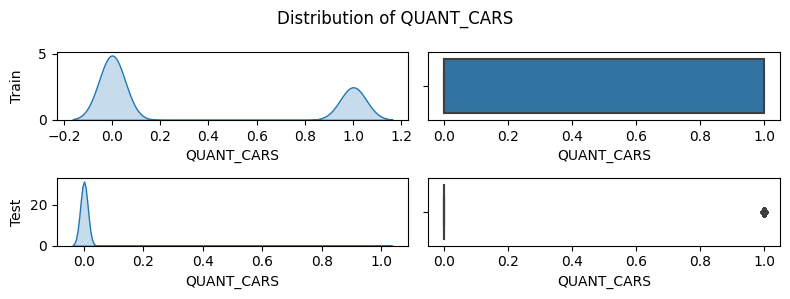

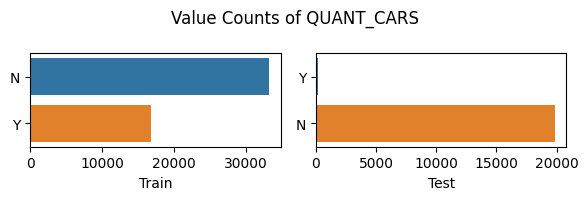

datatype train of QUANT_CARS: category
datatype test of QUANT_CARS: category


In [345]:
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
app_train_cop[curr_col_name] = np.where(app_train_cop[curr_col_name]==1,"Y","N")
app_test_cop[curr_col_name] = np.where(app_test_cop[curr_col_name]==1,"Y","N")
plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
cast_to_category(curr_col_name,app_train_cop,app_test_cop)


In [346]:
app_train_cop[["TARGET_LABEL_BAD=1",curr_col_name]].groupby([curr_col_name]).count()[::10]

,TARGET_LABEL_BAD=1
QUANT_CARS,
N,33193


In [347]:
# 'MONTHS_IN_THE_JOB' la mayoria de informacion se concentra 
# range in [0-40] months 3.3years
# it should be a numerical  but
# it has more counts in 0 (people who probably don't have a job)
# so cast to categorical: Y (have a job),N(don't have a job)
curr_col_name = "MONTHS_IN_THE_JOB"
#print(app_train_cop[curr_col_name].value_counts().sort_values(ascending=False)[::2])
app_train_cop[["TARGET_LABEL_BAD=1",curr_col_name]].groupby([curr_col_name]).count()[::2]

,TARGET_LABEL_BAD=1
MONTHS_IN_THE_JOB,
0,49924
2,18
4,4
6,2
8,2
10,1
14,2
18,2
26,1


In [348]:
app_train_cop.loc[app_train_cop[curr_col_name]>0,curr_col_name].sum()

466

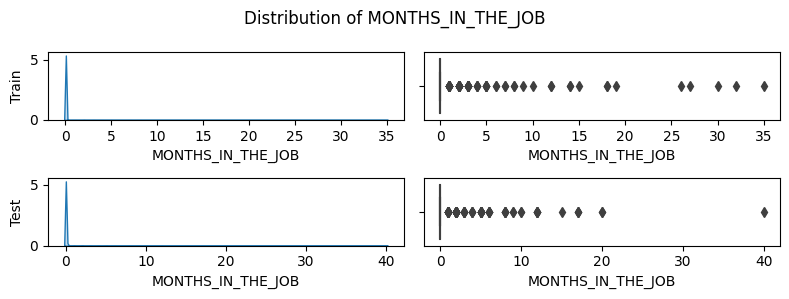

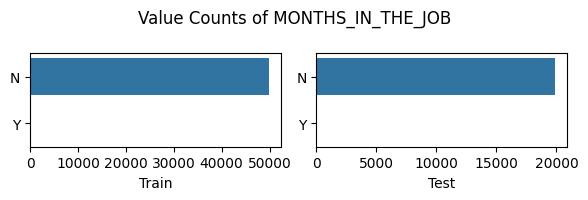

datatype train of MONTHS_IN_THE_JOB: category
datatype test of MONTHS_IN_THE_JOB: category


In [349]:
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
app_train_cop[curr_col_name] = np.where(app_train_cop[curr_col_name]==0,"N","Y")
app_test_cop[curr_col_name] = np.where(app_test_cop[curr_col_name]==0,"N","Y")
plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
cast_to_category(curr_col_name,app_train_cop,app_test_cop)


#### 'PROFESSION_CODE'
- searching codes only have a Brazil’s CBO94 codes but it has 
codes in group subgroups and general subgroups
- ranges of data is from [1-18],[1-27]

- If it has international code use [ISCO-08](https://www.ilo.org/public/english/bureau/stat/isco/docs/publication08.pdf), [ISCO-08 page](https://www.ilo.org/public/english/bureau/stat/isco/isco08/)

- If it has Brazil code use [CB094](http://www.mtecbo.gov.br/cbosite/pages/downloads.jsf), [CB094 page](http://www.mtecbo.gov.br/cbosite/pages/home.jsf)

- It is a good idea to delete this columne
- 1 reason it has many categories
- 2 reason it doesn't know the correct code of profession
- the high count is from code 9 but it could whatever profession in before standards, so it would be remove
- even if it has a good feature importance (TODO)

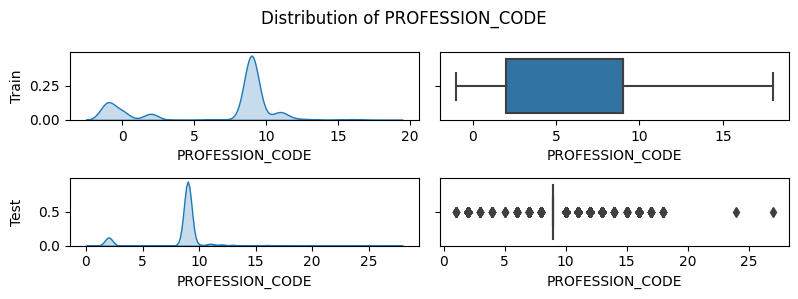

In [350]:
# 'PROFESSION_CODE' tiene mas de 7000 valores nulos, 
# hay valores del 0 hasta el 18, 
# pienso que podemos eliminar la columna en vez de las celdas.
curr_col_name = "PROFESSION_CODE"
app_train_cop[curr_col_name].fillna(-1,inplace=True)
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

#### OCCUPATION TYPE
- in this case range is only 5 distinct values
- we could use the bih group of codes but again
- it is a guess, we don't know exactly the mapping of codes to occupation type.
- it is considered we could add bias if the user select
- a wrong code
- for this reason this column will be remove anyway it will checks the feature importance if we consider this column

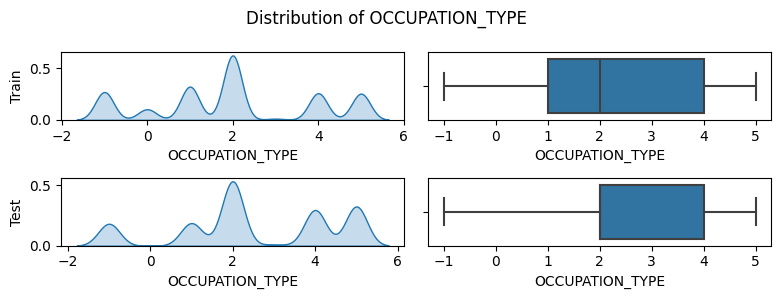

In [351]:
#'OCCUPATION_TYPE' tiene valores del 0 hasta el 5, 
# y 7313 valores nulo, podriamos cambiar el nulo 
# por desempleado (asumo que es valor de 0)
curr_col_name = "OCCUPATION_TYPE"
app_train_cop[curr_col_name].fillna(-1,inplace=True)
app_test_cop[curr_col_name].fillna(-1,inplace=True)
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

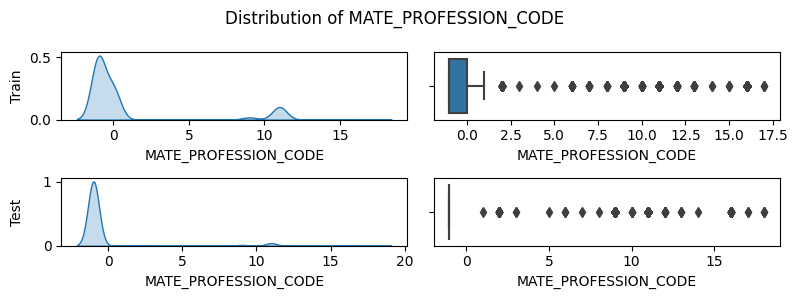

In [352]:
#'MATE_PROFESSION_CODE' tiene mas de 28 mil datos vacios, se puede eliminar.
curr_col_name = "MATE_PROFESSION_CODE"
app_train_cop[curr_col_name].fillna(-1,inplace=True)
app_test_cop[curr_col_name].fillna(-1,inplace=True)
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

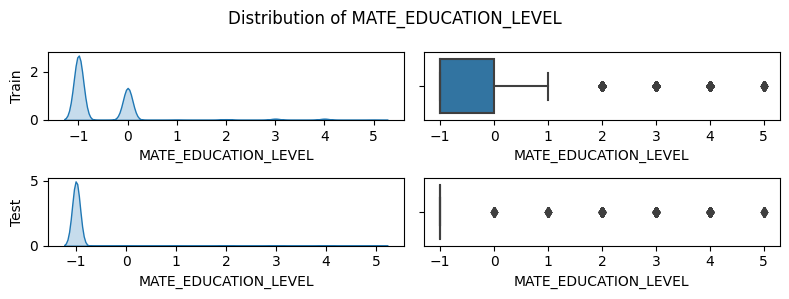

In [353]:
# it could remove because consideably it has many missing
# values and we don't know exactly the codes of professions
# it will be analyzed with feature importance but
# it is considerably dangerous to guess the code in this
# category variable
curr_col_name = "MATE_EDUCATION_LEVEL"
app_train_cop[curr_col_name].fillna(-1,inplace=True)
app_test_cop[curr_col_name].fillna(-1,inplace=True)
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

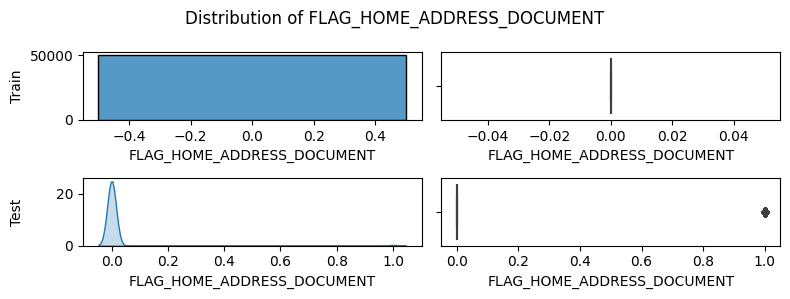

In [354]:
# 'FLAG_HOME_ADDRESS_DOCUMENT' 
# solo tiene un valor de 0 para todas las filas, 
# se puede eliminar.

# thinking on domain problem it will be replaced 
# by RESIDENCE_TYPE and MONTHS_IN_RESIDENCE

# if we choose a flag with 2 values or vector of flags
# in RESIDENCE_TYPE or vector of number in MONTHS_IN_RESIDENCE
# it is better a vector

curr_col_name = "FLAG_HOME_ADDRESS_DOCUMENT"
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

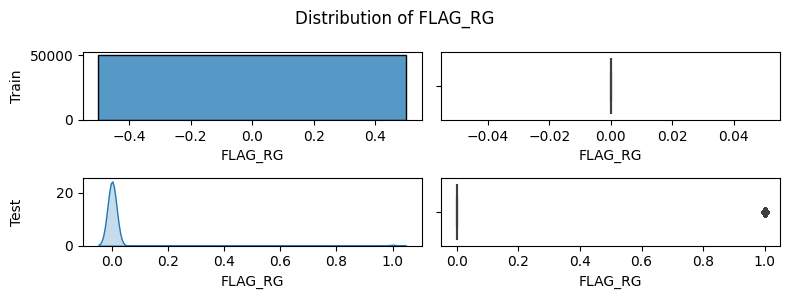

In [355]:
# FLAG_RG
# Flag indicating documental confirmation of citizen card number
# same as "FLAG_HOME_ADDRESS_DOCUMENT"
curr_col_name = "FLAG_RG"
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

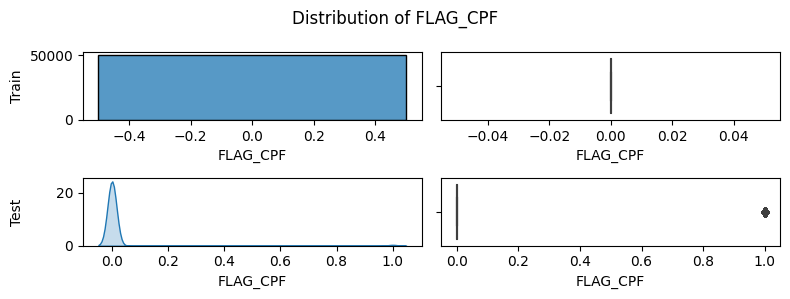

In [356]:
# FLAG_CPF            
# Flag indicating documental confirmation of tax payer status
# same as "FLAG_HOME_ADDRESS_DOCUMENT"
curr_col_name = "FLAG_CPF"
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

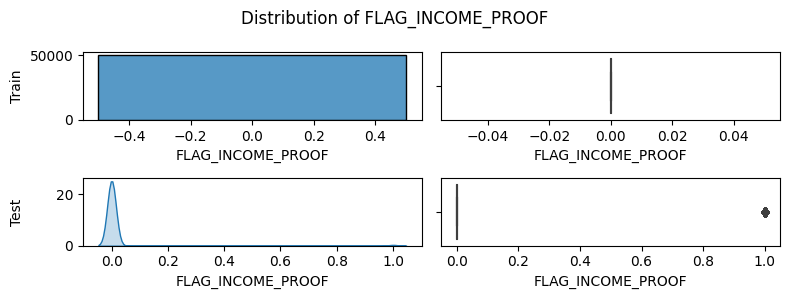

In [357]:
# FLAG_INCOME_PROOF   
# Flag indicating documental confirmation of income
# same as "FLAG_HOME_ADDRESS_DOCUMENT"
curr_col_name = "FLAG_INCOME_PROOF"
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

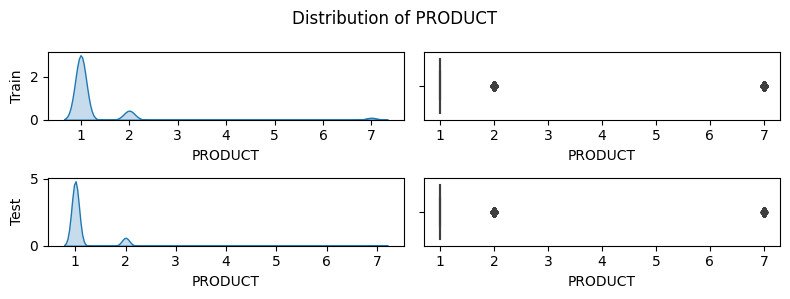

In [358]:
# PRODUCT             
# Type of credit product applied. Encoding not informed
# again it doesn't have exactly mapping codes
# it must be removed
curr_col_name = "PRODUCT"
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)
remove_tmp_column(curr_col_name,app_train_cop,app_test_cop)

lims: [-2.0,86.0]
lims: [-3.0,77.0]


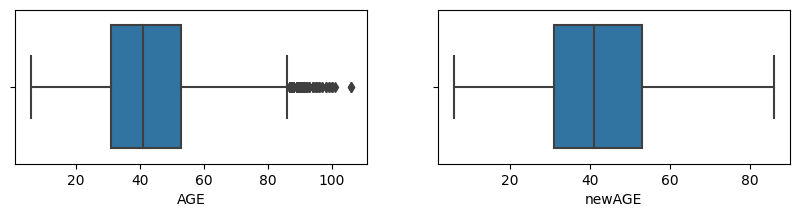

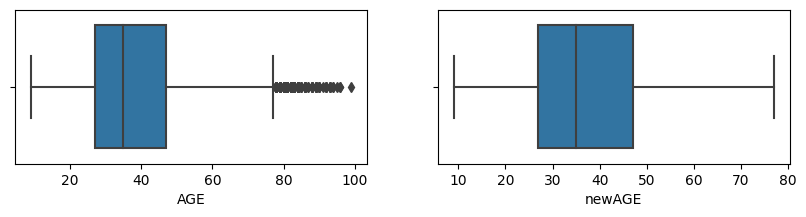

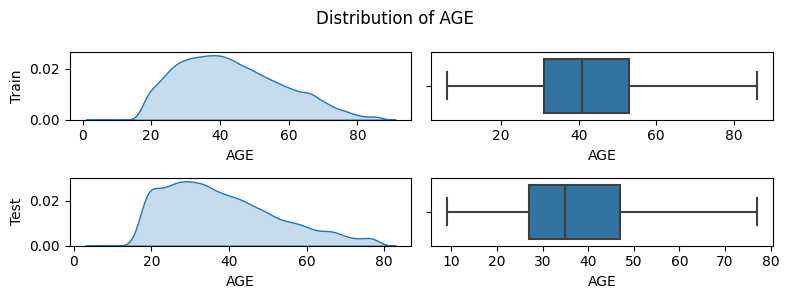

In [359]:
# AGE 
# Applicant's age at the moment of submission
# it should be a numerical value
curr_col_name = "AGE"
proc_outliers(app_train_cop,curr_col_name)
proc_outliers(app_test_cop,curr_col_name)
plotting_distribution(curr_col_name,app_train_cop,app_test_cop)

In [360]:
# there exist people who have less than 18 years old
# but they can get a loan and people who has more than
# 70 years old and they can get a loan too

app_train_cop[["TARGET_LABEL_BAD=1",curr_col_name]].groupby([curr_col_name]).count()[-8:]

,TARGET_LABEL_BAD=1
AGE,
79,107
80,85
81,73
82,67
83,53
84,51
85,42
86,153


#### Working with categorical columns

In [361]:
category_field_names = app_train.select_dtypes(exclude="number").columns.to_list()

In [362]:
for categorical_field in category_field_names:
    print("{:<32}{:<8}{}".format(categorical_field,len(app_train[categorical_field].unique()),metadata.iloc[metadata_dic[categorical_field],2]))

CLERK_TYPE                      1       C
APPLICATION_SUBMISSION_TYPE     3       Web, Carga
SEX                             4       M=Male, F=Female
STATE_OF_BIRTH                  29      Brazilian states, XX, missing
CITY_OF_BIRTH                   9910    nan
RESIDENCIAL_STATE               27      nan
RESIDENCIAL_CITY                3529    nan
RESIDENCIAL_BOROUGH             14511   nan
FLAG_RESIDENCIAL_PHONE          2       Y,N
RESIDENCIAL_PHONE_AREA_CODE     102     nan
FLAG_MOBILE_PHONE               1       Y,N
COMPANY                         2       Y,N
PROFESSIONAL_STATE              28      nan
PROFESSIONAL_CITY               2237    nan
PROFESSIONAL_BOROUGH            5058    nan
FLAG_PROFESSIONAL_PHONE         2       Y,N
PROFESSIONAL_PHONE_AREA_CODE    87      nan
FLAG_ACSP_RECORD                1       Y, N
RESIDENCIAL_ZIP_3               1481    nan
PROFESSIONAL_ZIP_3              1481    nan


In [363]:
for categorical_field in category_field_names:
    print("{:<32}{:<8}{}".format(categorical_field,len(app_train[categorical_field].unique()),metadata.iloc[metadata_dic[categorical_field],1]))

CLERK_TYPE                      1       Not informed
APPLICATION_SUBMISSION_TYPE     3       Indicates if the application was submitted via the internet or in person/posted
SEX                             4       nan
STATE_OF_BIRTH                  29      nan
CITY_OF_BIRTH                   9910    nan
RESIDENCIAL_STATE               27      State of residence
RESIDENCIAL_CITY                3529    City of residence
RESIDENCIAL_BOROUGH             14511   Borough of residence
FLAG_RESIDENCIAL_PHONE          2       Indicates if the applicant possesses a home phone
RESIDENCIAL_PHONE_AREA_CODE     102     Three-digit pseudo-code
FLAG_MOBILE_PHONE               1       Indicates if the applicant possesses a mobile phone
COMPANY                         2       If the applicant has supplied the name of the company where he/she formally works
PROFESSIONAL_STATE              28      State where the applicant works
PROFESSIONAL_CITY               2237    City where the applicant works
PROFES

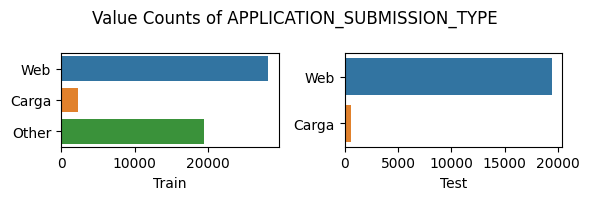

datatype train of APPLICATION_SUBMISSION_TYPE: category
datatype test of APPLICATION_SUBMISSION_TYPE: category


In [364]:
# APPLICATION_SUBMISSION_TYPE
# 'APPLICATION_SUBMISSION_TYPE' tiene ('0' 'Carga' 'Web') 
# 0 será dispuesto como Otro y tratado categorico
curr_col_name = "APPLICATION_SUBMISSION_TYPE"
app_train_cop[["TARGET_LABEL_BAD=1",curr_col_name]].groupby([curr_col_name]).count()
app_train_cop.loc[app_train_cop[curr_col_name]=="0",curr_col_name] = "Other"
app_test_cop.loc[app_test_cop[curr_col_name]=="0",curr_col_name] = "Other"
plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
cast_to_category(curr_col_name,app_train_cop,app_test_cop)

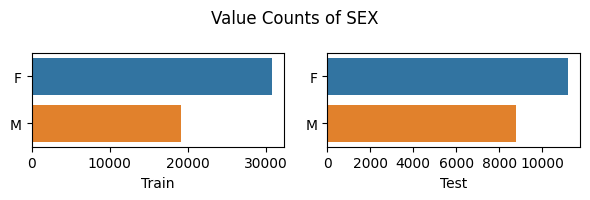

datatype train of SEX: category
datatype test of SEX: category


In [365]:
# 'SEX'
# se conserva y es asignada como categorica
# los valores N y " " serán asignadas como nueva categoria
# pero la cantidad de valores asociados es muy pequeño
# además en las prediciones no se cuenta con una categoria adicional
# por lo pronto se removerán dichas filas

curr_col_name = "SEX"
# only in train
app_train_cop.drop(app_train_cop[(app_train_cop[curr_col_name]=="N") | (app_train_cop[curr_col_name]==" ")].index,inplace=True)
plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
cast_to_category(curr_col_name,app_train_cop,app_test_cop)

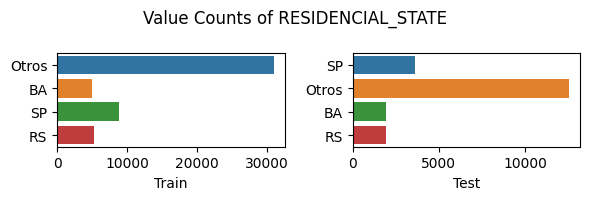

datatype train of RESIDENCIAL_STATE: category
datatype test of RESIDENCIAL_STATE: category


In [366]:
# RESIDENCIAL_STATE
# it could be add some importance to the model
# because it is the current place where people live
# territory has a different economy so it has a good weight on model
curr_col_name = "RESIDENCIAL_STATE"
#"SP","RS","BA"
app_train_cop.loc[~app_train_cop[curr_col_name].isin(["SP","RS","BA"]),curr_col_name] = "Otros"
app_test_cop.loc[~app_test_cop[curr_col_name].isin(["SP","RS","BA"]),curr_col_name] = "Otros"
plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
cast_to_category(curr_col_name,app_train_cop,app_test_cop)

datatype train of FLAG_PROFESSIONAL_PHONE: category
datatype test of FLAG_PROFESSIONAL_PHONE: category


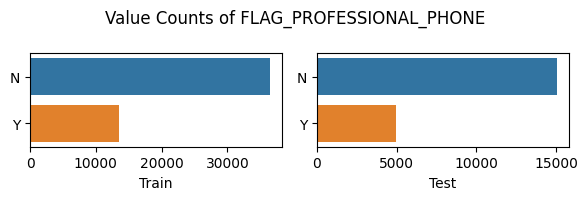

datatype train of FLAG_RESIDENCIAL_PHONE: category
datatype test of FLAG_RESIDENCIAL_PHONE: category


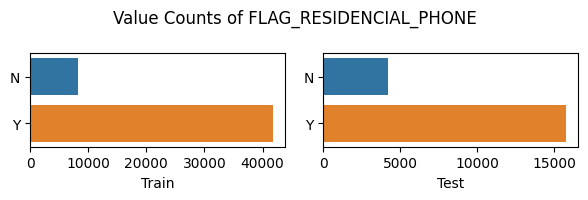

datatype train of FLAG_MOBILE_PHONE: category
datatype test of FLAG_MOBILE_PHONE: category


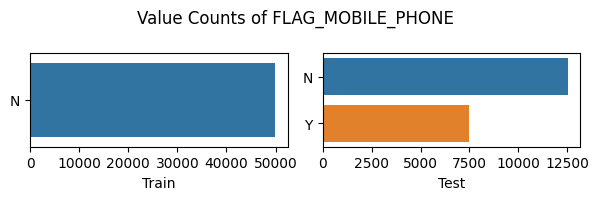

datatype train of COMPANY: category
datatype test of COMPANY: category


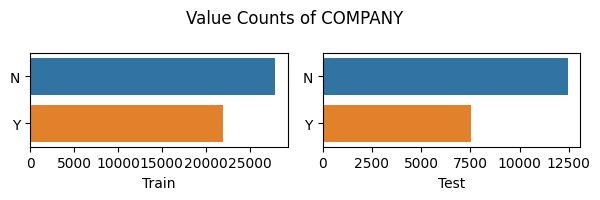

datatype train of FLAG_ACSP_RECORD: category
datatype test of FLAG_ACSP_RECORD: category


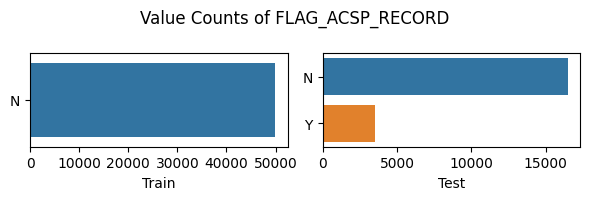

In [367]:
# 'FLAG_PROFESSIONAL_PHONE'
# it could be a good disparity to set if a person has a job
# 'FLAG_RESIDENCIAL_PHONE'
# it could be a good disparity to set if a person has a house
curr_col_name = "FLAG_PROFESSIONAL_PHONE"
cast_to_category(curr_col_name,app_train_cop,app_test_cop)
plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
curr_col_name = "FLAG_RESIDENCIAL_PHONE"
cast_to_category(curr_col_name,app_train_cop,app_test_cop)
plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
curr_col_name = "FLAG_MOBILE_PHONE"
cast_to_category(curr_col_name,app_train_cop,app_test_cop)
plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
curr_col_name = "COMPANY"
cast_to_category(curr_col_name,app_train_cop,app_test_cop)
plot_value_counts(curr_col_name,app_train_cop,app_test_cop)
# FLAG_ACSP_RECORD 
# Flag indicating if the applicant 
# has any previous credit delinquency
curr_col_name = "FLAG_ACSP_RECORD"
cast_to_category(curr_col_name,app_train_cop,app_test_cop)
plot_value_counts(curr_col_name,app_train_cop,app_test_cop)

In [368]:
# STATE_OF_BIRTH
# 'STATE_OF_BIRTH' tiene 29 valores diferentes incluyendo 
# un espacio vacio y XX,
# se eliminará dicha variable al no poseer mucha carga
# o aporte al modelo, ya que no hay mucha valor
# de importancia sobre la variable TARGET
domain_outside_columns = [
    "CLERK_TYPE",
    "STATE_OF_BIRTH",
    "CITY_OF_BIRTH",
    "RESIDENCIAL_STATE",
    "RESIDENCIAL_CITY",
    "RESIDENCIAL_BOROUGH",
    "RESIDENCIAL_PHONE_AREA_CODE",
    "PROFESSIONAL_STATE",
    "PROFESSIONAL_CITY",
    "PROFESSIONAL_BOROUGH",
    "FLAG_PROFESSIONAL_PHONE",
    "PROFESSIONAL_PHONE_AREA_CODE",
    "RESIDENCIAL_ZIP_3",
    "PROFESSIONAL_ZIP_3",
]

for outside_column in domain_outside_columns:
    remove_tmp_column(outside_column,app_train_cop,app_test_cop)

#### Cleaning Data
- Next steps
1. Standarization with robust scaler


In [374]:
#app_train_cop.iloc[:,:-1]
app_train_cop.iloc["TARGET_LABEL_BAD"]

,QUANT_BANKING_ACCOUNTS_TOT
0,0
1,0
2,0
3,0
4,0
...,...
49995,2
49996,0
49997,0
49998,0


In [375]:
X_train, y_train, X_val, y_val, X_test = data_utils.get_feature_target(app_train_cop,app_test_cop)

In [376]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV

In [378]:
numeric_features = X_train.select_dtypes(include="number").columns.to_list()
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", RobustScaler())]
)
categorical_features = X_train.select_dtypes(exclude="number").columns.to_list()
# after OHE select the best categories of features
#reduce the dimensionality by selecting categories using 
# a chi-squared test.
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
# apply preprocessing pipelines 
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# using classifier pipeline
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_val, y_val))

model score: 0.741
